In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [2]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [3]:
g_data = pd.read_csv("german_credit.csv")

In [4]:
# Lets build a Ensemble model but need to modify the dataset first
g_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [5]:
g_data.describe().T

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [6]:
g_data_obj = g_data.select_dtypes(include = ['object'])

In [7]:
for feature in g_data_obj.columns:
    print("Column Name: " + feature)
    print("Number of unique data points : " + str(pd.unique(g_data_obj[feature]).size))
    print(pd.unique(g_data_obj[feature]))
    print("\n")

Column Name: account_check_status
Number of unique data points : 4
['< 0 DM' '0 <= ... < 200 DM' 'no checking account'
 '>= 200 DM / salary assignments for at least 1 year']


Column Name: credit_history
Number of unique data points : 5
['critical account/ other credits existing (not at this bank)'
 'existing credits paid back duly till now'
 'delay in paying off in the past'
 'no credits taken/ all credits paid back duly'
 'all credits at this bank paid back duly']


Column Name: purpose
Number of unique data points : 10
['domestic appliances' '(vacation - does not exist?)' 'radio/television'
 'car (new)' 'car (used)' 'business' 'repairs' 'education'
 'furniture/equipment' 'retraining']


Column Name: savings
Number of unique data points : 5
['unknown/ no savings account' '... < 100 DM' '500 <= ... < 1000 DM '
 '.. >= 1000 DM ' '100 <= ... < 500 DM']


Column Name: present_emp_since
Number of unique data points : 5
['.. >= 7 years' '1 <= ... < 4 years' '4 <= ... < 7 years' 'unemployed

From the above data, we can conclude that the columns -  'foreign_worker', 'telephone', 'housing', 'other_investment_plans', 'other_debtors' are easy for creating dummies.

the column - 'purpose' and 'personal_status_sex' need to be considered and clubbed to make meaningful categories and clear ones.

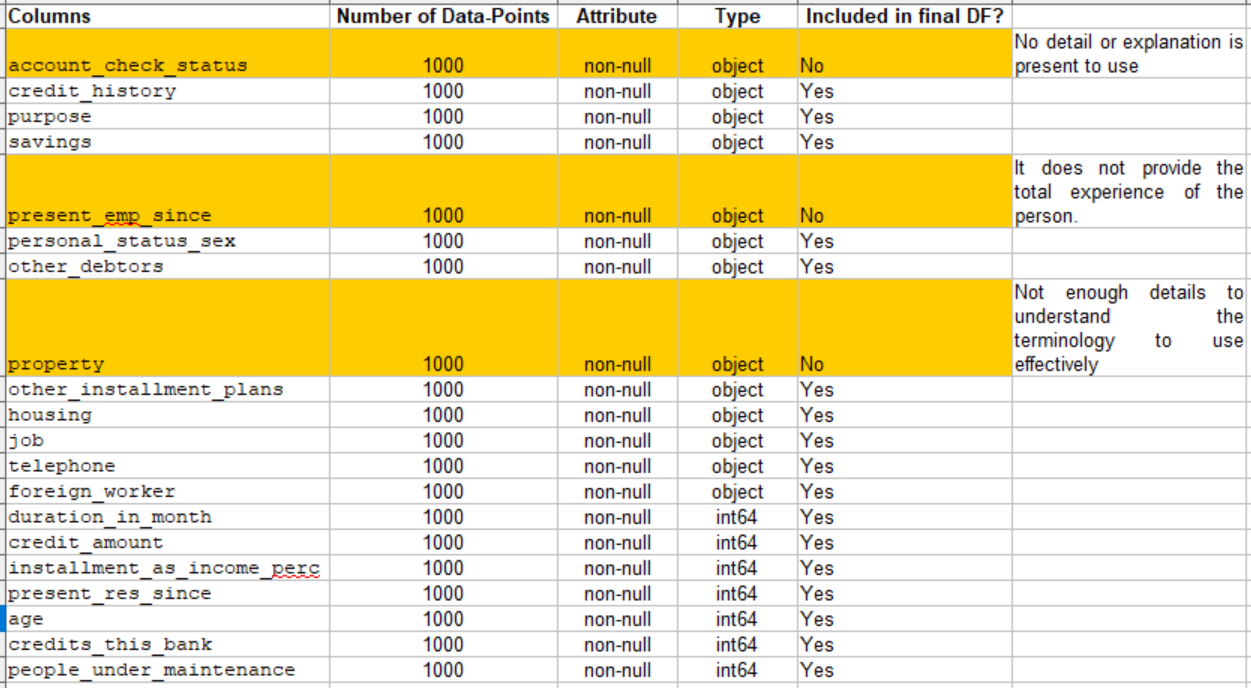

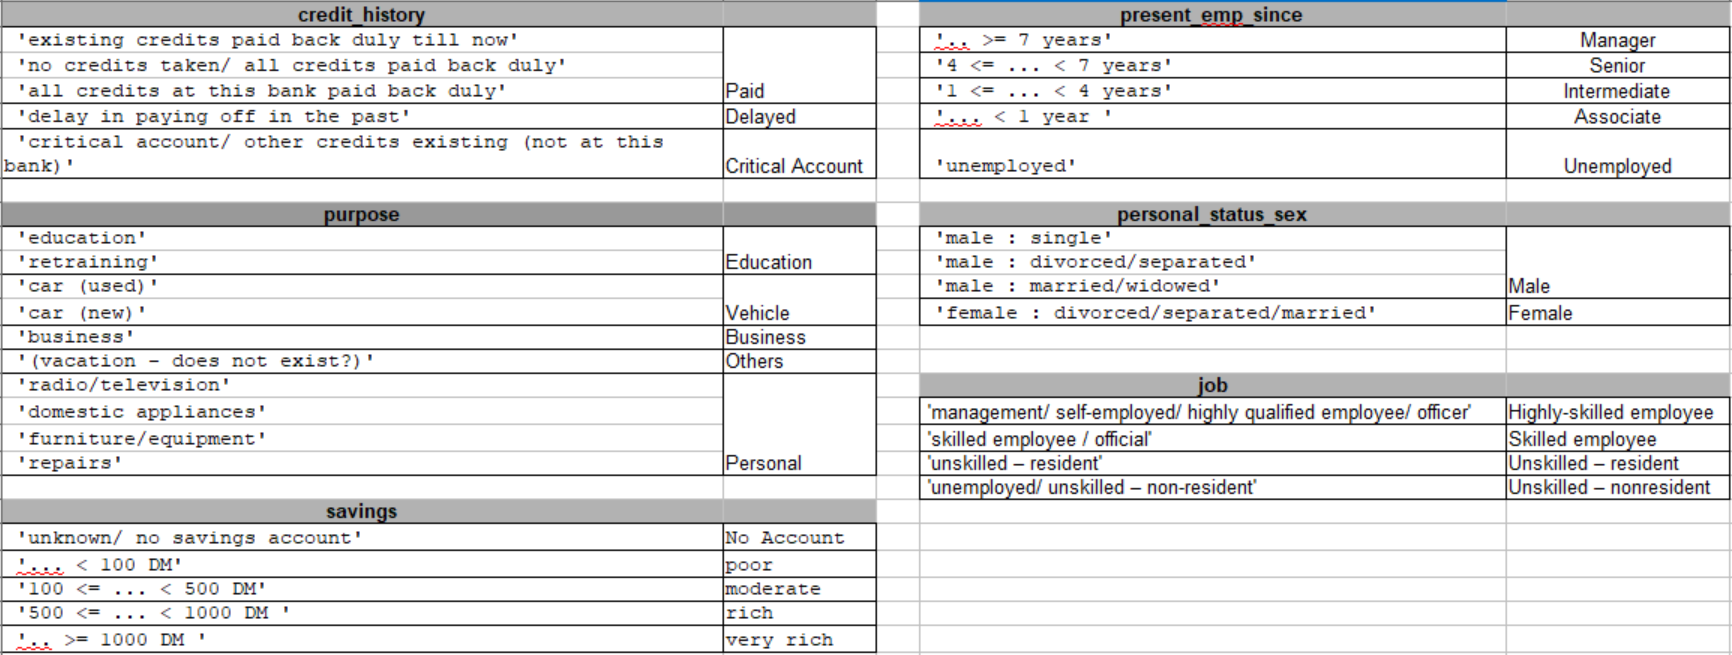

In [8]:
#Gender
for i in range(g_data.shape[0]):
    if(g_data.personal_status_sex[i] == 'female : divorced/separated/married'):
        g_data.personal_status_sex[i] = 'female'
    elif(g_data.personal_status_sex[i] == 'male : single'or g_data.personal_status_sex[i] =='male : divorced/separated' or g_data.personal_status_sex[i] == 'male : married/widowed'):
        g_data.personal_status_sex[i] = 'male'

In [9]:
#Purpose
for i in range(g_data.shape[0]):
    if(g_data.purpose[i] == 'domestic appliances' or g_data.purpose[i] =='radio/television' or g_data.purpose[i] =='furniture/equipment' or g_data.purpose[i] =='repairs'):
        g_data.purpose[i] = 'Personal'
    elif(g_data.purpose[i] == 'car (new)' or g_data.purpose[i] =='car (used)'):
        g_data.purpose[i] = 'Vehicle'
    elif(g_data.purpose[i] == 'retraining' or g_data.purpose[i] =='education'):
        g_data.purpose[i] = 'Education'
    elif(g_data.purpose[i] == '(vacation - does not exist?)'):
        g_data.purpose[i] = 'Others'
    elif(g_data.purpose[i] == 'business'):
        g_data.purpose[i] = 'Business'

In [10]:
#Job
for i in range(g_data.shape[0]):
    if(g_data.job[i] == 'management/ self-employed/ highly qualified employee/ officer'):
        g_data.job[i] = 'Highly-skilled'
    elif(g_data.job[i] == 'skilled employee / official'):
        g_data.job[i] = 'Skilled'
    elif(g_data.job[i] == 'unemployed/ unskilled – non-resident'):
        g_data.job[i] = 'Unskilled – nonresident'


In [11]:
#Savings
for i in range(g_data.shape[0]):
    if(g_data.savings[i] == 'unknown/ no savings account'):
        g_data.savings[i] = 'no account'
    elif(g_data.savings[i] == '... < 100 DM'):
        g_data.savings[i] = 'poor'
    elif(g_data.savings[i] == '100 <= ... < 500 DM'):
        g_data.savings[i] = 'moderate'
    elif(g_data.savings[i] == '500 <= ... < 1000 DM '):
        g_data.savings[i] = 'rich'
    elif(g_data.savings[i] == '.. >= 1000 DM '):
        g_data.savings[i] = 'very rich'


In [12]:
#Credit History
for i in range(g_data.shape[0]):
    if(g_data.credit_history[i] ==  'existing credits paid back duly till now' or g_data.credit_history[i] ==  'no credits taken/ all credits paid back duly' or g_data.credit_history[i] ==  'all credits at this bank paid back duly'):
        g_data.credit_history[i] = 'Paid'
    elif(g_data.credit_history[i] == 'delay in paying off in the past'):
        g_data.credit_history[i] = 'Delayed'
    elif(g_data.credit_history[i] == 'critical account/ other credits existing (not at this bank)'):
        g_data.credit_history[i] = 'Critical_Account'

In [13]:
g_data.drop(columns = {'account_check_status','present_emp_since','property'}, inplace = True)

In [14]:
y = g_data.pop('default')

In [15]:
g_data_obj2 = g_data.select_dtypes(include = ['object'])

for feature in g_data_obj2.columns:
    print("Column Name: " + feature)
    print("Number of unique data points : " + str(pd.unique(g_data_obj2[feature]).size))
    print(pd.unique(g_data_obj2[feature]))
    print("\n")

Column Name: credit_history
Number of unique data points : 3
['Critical_Account' 'Paid' 'Delayed']


Column Name: purpose
Number of unique data points : 5
['Personal' 'Others' 'Vehicle' 'Business' 'Education']


Column Name: savings
Number of unique data points : 5
['no account' 'poor' 'rich' 'very rich' 'moderate']


Column Name: personal_status_sex
Number of unique data points : 2
['male' 'female']


Column Name: other_debtors
Number of unique data points : 3
['none' 'guarantor' 'co-applicant']


Column Name: other_installment_plans
Number of unique data points : 3
['none' 'bank' 'stores']


Column Name: housing
Number of unique data points : 3
['own' 'for free' 'rent']


Column Name: job
Number of unique data points : 4
['Skilled' 'unskilled - resident' 'Highly-skilled'
 'unemployed/ unskilled - non-resident']


Column Name: telephone
Number of unique data points : 2
['yes, registered under the customers name ' 'none']


Column Name: foreign_worker
Number of unique data points : 2
[

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [16]:
dummy = pd.get_dummies(g_data_obj2)
dummy = pd.DataFrame(dummy)

In [17]:
g_data.columns

Index(['duration_in_month', 'credit_history', 'purpose', 'credit_amount',
       'savings', 'installment_as_income_perc', 'personal_status_sex',
       'other_debtors', 'present_res_since', 'age', 'other_installment_plans',
       'housing', 'credits_this_bank', 'job', 'people_under_maintenance',
       'telephone', 'foreign_worker'],
      dtype='object')

In [18]:
g_data_obj2.columns

Index(['credit_history', 'purpose', 'savings', 'personal_status_sex',
       'other_debtors', 'other_installment_plans', 'housing', 'job',
       'telephone', 'foreign_worker'],
      dtype='object')

In [19]:
g_data.drop(columns = {'credit_history', 'purpose', 'savings', 'personal_status_sex',
       'other_debtors', 'other_installment_plans', 'housing', 'job',
       'telephone', 'foreign_worker'}, inplace = True)

In [20]:
#g_data = g_data.append(dummy)
g_data = pd.concat([g_data, dummy], axis=1, sort=False)

In [21]:
g_data.shape

(1000, 39)

In [22]:
g_data.head(10)

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,credit_history_Critical_Account,credit_history_Delayed,credit_history_Paid,...,housing_own,housing_rent,job_Highly-skilled,job_Skilled,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,6,1169,4,4,67,2,1,1,0,0,...,1,0,0,1,0,0,0,1,0,1
1,48,5951,2,2,22,1,1,0,0,1,...,1,0,0,1,0,0,1,0,0,1
2,12,2096,2,3,49,1,2,1,0,0,...,1,0,0,0,0,1,1,0,0,1
3,42,7882,2,4,45,1,2,0,0,1,...,0,0,0,1,0,0,1,0,0,1
4,24,4870,3,4,53,2,2,0,1,0,...,0,0,0,1,0,0,1,0,0,1
5,36,9055,2,4,35,1,2,0,0,1,...,0,0,0,0,0,1,0,1,0,1
6,24,2835,3,4,53,1,1,0,0,1,...,1,0,0,1,0,0,1,0,0,1
7,36,6948,2,2,35,1,1,0,0,1,...,0,1,1,0,0,0,0,1,0,1
8,12,3059,2,4,61,1,1,0,0,1,...,1,0,0,0,0,1,1,0,0,1
9,30,5234,4,2,28,2,1,1,0,0,...,1,0,1,0,0,0,1,0,0,1


In [23]:
# Print Shape of model data

### Check for highly correlated variables but don't required any treatment for this use case

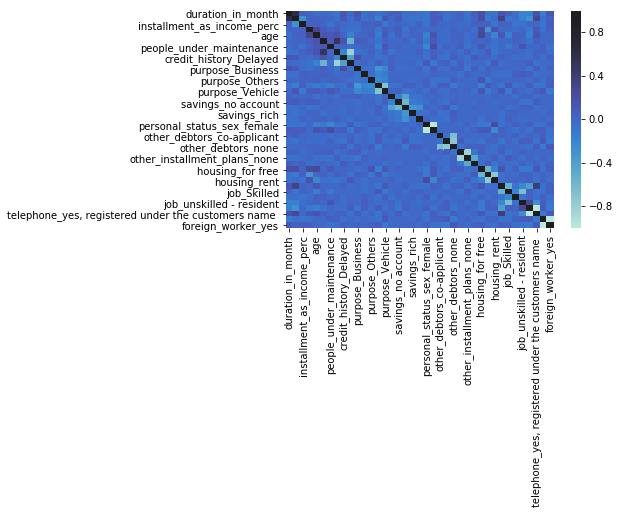

In [26]:
correlation = g_data.corr()
correlation
#fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlation, center=True)

### Drop the original variables which are converted to dummy

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(g_data, y, test_size = 0.3, train_size = 0.7, random_state = 99)

In [28]:
x_train

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,credit_history_Critical_Account,credit_history_Delayed,credit_history_Paid,...,housing_own,housing_rent,job_Highly-skilled,job_Skilled,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
26,6,426,4,4,39,1,1,0,0,1,...,1,0,0,0,0,1,1,0,0,1
155,12,1282,2,4,20,1,1,0,0,1,...,0,1,0,1,0,0,1,0,0,1
872,24,1382,4,1,26,2,1,1,0,0,...,1,0,0,1,0,0,0,1,0,1
383,12,1330,4,1,26,1,1,0,0,1,...,1,0,0,1,0,0,1,0,0,1
648,24,947,4,3,38,1,2,0,0,1,...,0,0,0,1,0,0,1,0,0,1
671,36,5742,2,2,31,2,1,0,0,1,...,1,0,0,1,0,0,0,1,0,1
893,36,5800,3,4,34,2,1,1,0,0,...,1,0,0,1,0,0,0,1,0,1
369,18,3001,2,4,40,1,1,0,0,1,...,0,1,0,1,0,0,1,0,0,1
873,15,874,4,1,24,1,1,0,0,1,...,1,0,0,1,0,0,1,0,0,1
99,20,7057,3,4,36,2,2,0,1,0,...,0,1,1,0,0,0,0,1,0,1


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [29]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion='entropy',random_state=9999)

In [30]:
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

In [31]:
clm_df = pd.DataFrame(x_train.columns)
imp_df = pd.DataFrame(clf.feature_importances_)
clm_imp = pd.concat([clm_df, imp_df], axis=1, sort=False)
clm_imp.columns = ['features','importance']

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [32]:
y_pred = clf.predict(x_test)

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score

conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ')
print(conf_mat)

 
print('\n Accuracy score')
print(accuracy_score(y_test,y_pred))

Confusion Matrix: 
[[204  12]
 [ 64  20]]

 Accuracy score
0.7466666666666667


### Q6 Show the list of the features importance( 1 Marks)

In [34]:
#Important features
print('Important features (feature importance > 0.05):')
for i in range(clm_imp.shape[0]):
    if clm_imp.importance[i] > 0.05:
        print(' * '+str(clm_imp.features[i]))

Important features (feature importance > 0.05):
 * duration_in_month
 * credit_amount
 * installment_as_income_perc
 * present_res_since
 * age


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [35]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [36]:
# Use below values
num_folds = 10
seed = 77

In [37]:
#Validate the Random Forest model build above using k fold
kfld = KFold(n_splits = num_folds, random_state = 77)

In [38]:
#print(kfld)
#kfld.split(g_data)
score = []

for train_index, test_index in kfld.split(g_data,y):
    y_train, y_test = y[train_index], y[test_index] 
    
    X_train = pd.DataFrame()
    for indx in train_index:
        X_train = X_train.append(g_data.iloc[indx,:])
    #print(X_train.shape)
    
    X_test = pd.DataFrame()
    for indx in test_index:
        X_test = X_test.append(g_data.iloc[indx,:])
        
    clfer = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion='entropy',random_state=9999)
    clfer.fit(X_train,y_train)
    y_pred = clfer.predict(X_test)
    
    conf_mat = confusion_matrix(y_test, y_pred)
    print('\n Confusion Matrix: ')
    print(conf_mat)
    
    print('\n Accuracy score')
    score_ind = accuracy_score(y_test,y_pred)
    print(score_ind)
    score.append(score_ind)


 Confusion Matrix: 
[[71  4]
 [12 13]]

 Accuracy score
0.84

 Confusion Matrix: 
[[63  5]
 [25  7]]

 Accuracy score
0.7

 Confusion Matrix: 
[[73  4]
 [18  5]]

 Accuracy score
0.78

 Confusion Matrix: 
[[67  5]
 [16 12]]

 Accuracy score
0.79

 Confusion Matrix: 
[[68  4]
 [23  5]]

 Accuracy score
0.73

 Confusion Matrix: 
[[53  6]
 [33  8]]

 Accuracy score
0.61

 Confusion Matrix: 
[[60 10]
 [21  9]]

 Accuracy score
0.69

 Confusion Matrix: 
[[67  1]
 [23  9]]

 Accuracy score
0.76

 Confusion Matrix: 
[[66  5]
 [19 10]]

 Accuracy score
0.76

 Confusion Matrix: 
[[67  1]
 [24  8]]

 Accuracy score
0.75


In [39]:
#Calculate Mean score

In [40]:
print('Mean score of all the models iterated in k-fold cross validation is: ' + str(pd.DataFrame(score).mean()))

Mean score of all the models iterated in k-fold cross validation is: 0    0.741
dtype: float64


In [41]:
# Calculate score standard deviation using std()

In [42]:
print('Standard deviation in score of all the models iterated in k-fold cross validation is: ' + str(pd.DataFrame(score).std()))

Standard deviation in score of all the models iterated in k-fold cross validation is: 0    0.063325
dtype: float64


# Q8 Print the confusion matrix( 1 Marks)

#### Confusion matric has been printed in the above question

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [43]:
conf_mat

array([[67,  1],
       [24,  8]], dtype=int64)

In [44]:
pp = (conf_mat[0][0]/100)*100
print('Precent of correct predicitions: '+str(pp))

Precent of correct predicitions: 67.0


In [45]:
precision = (conf_mat[0][0])/(conf_mat[0][0]+conf_mat[0][1])
print('Precision: '+str(precision))

Precision: 0.9852941176470589


In [46]:
recall = (conf_mat[0][0])/(conf_mat[0][0]+conf_mat[1][0])
print('Recall: '+str(recall))

Recall: 0.7362637362637363


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [47]:
#Hint: Use roc_curve

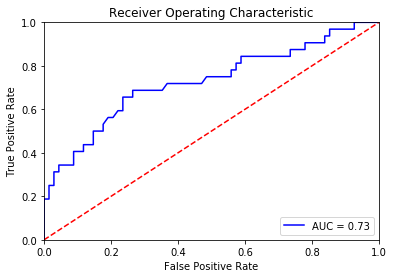

In [48]:

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clfer.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [49]:
auc = metrics.roc_auc_score(y_test, preds)
print('percentage of the ROC plot that is underneath the curve: ' + str(auc*100))

percentage of the ROC plot that is underneath the curve: 72.74816176470587


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [52]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [53]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

rfm = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion='entropy',random_state=9999)

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [54]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.735
Standard deviation:  0.015652475842498542
